(116, 13)
Training data shape: (81, 12)
Test data shape: (35, 12)
--- Logistic Regression ---
              precision    recall  f1-score   support

     Bhairav       0.89      1.00      0.94         8
      Poorvi       1.00      1.00      1.00        14
        Todi       1.00      0.92      0.96        13

    accuracy                           0.97        35
   macro avg       0.96      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714

--- KNN ---
              precision    recall  f1-score   support

     Bhairav       1.00      1.00      1.00         8
      Poorvi       0.87      0.93      0.90        14
        Todi       0.92      0.85      0.88        13

    accuracy                           0.91        35
   macro avg       0.93      0.92      0.93        35
weighted avg       0.92      0.91      0.91        35

Accuracy: 0.9142857142857143

--- Decision Tree ---
              precision    recall  f1-score   supp

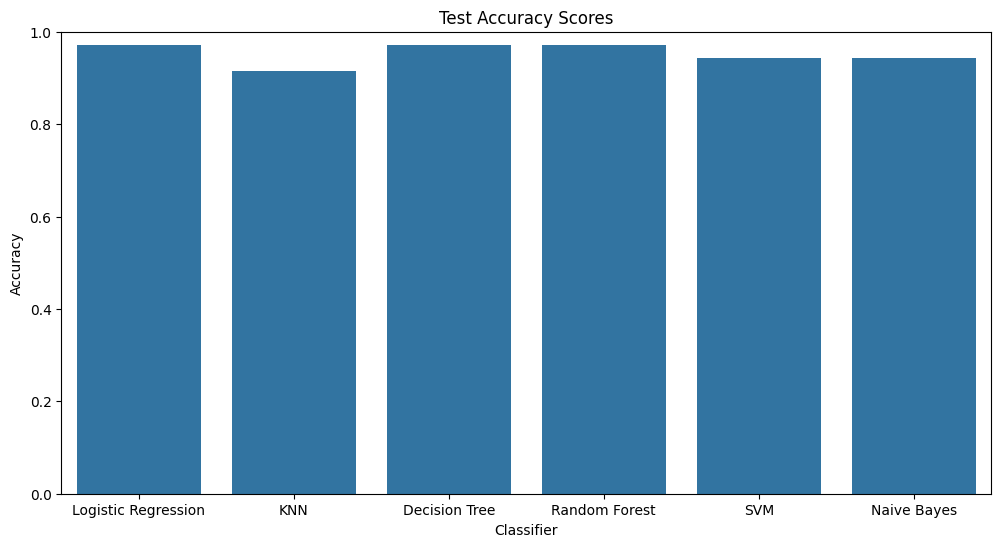

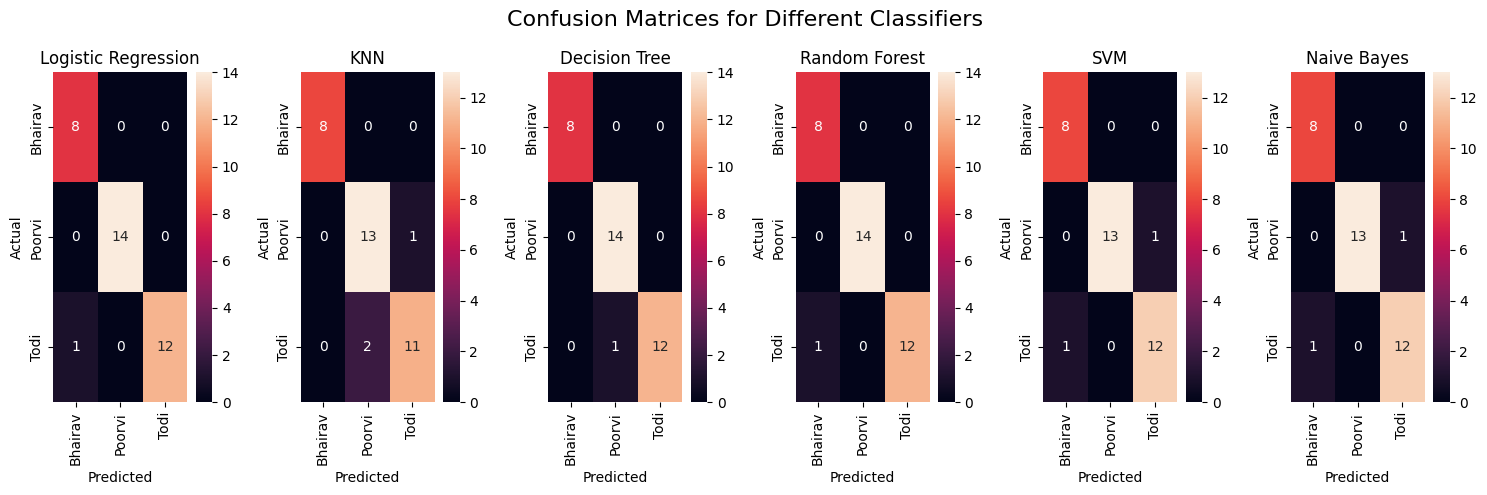

In [ ]:
# Import necessary libraries
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import math
import itertools
import statistics
import seaborn as sns
import matplotlib.transforms as transforms

# scikit-learn related imports
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Corrected import
from sklearn.neighbors import BallTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  # Naive Bayes import

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Raag thesis/Bhatkhande-Dataset.csv")
print(df.shape)

# Feature selection and target variable
X = df.drop(columns=['Raag'])
y = df['Raag']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Apply feature scaling for certain models like Logistic Regression, SVM, and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree', metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(splitter='best', max_depth=None),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()  # Naive Bayes classifier
}

# Initialize lists to store results
accuracy_scores = []
confusion_matrices = {}

# Loop over classifiers to train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, accuracy))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Print classification report and accuracy
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy}\n')

# Convert accuracy scores into a DataFrame for easier plotting
accuracy_df = pd.DataFrame({
    'Classifier': [name for name, _ in accuracy_scores],
    'Accuracy': [score for _, score in accuracy_scores]
})

# Plot accuracy scores comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df)
plt.title('Test Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Set up the matplotlib figure for confusion matrices
fig, axes = plt.subplots(1, len(confusion_matrices), figsize=(15, 5))
for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrices for Different Classifiers', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(116, 13)
Training data shape: (81, 12)
Test data shape: (35, 12)
--- Logistic Regression ---
              precision    recall  f1-score   support

     Bhairav       0.89      1.00      0.94         8
      Poorvi       1.00      1.00      1.00        14
        Todi       1.00      0.92      0.96        13

    accuracy                           0.97        35
   macro avg       0.96      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714

--- Decision Tree ---
              precision    recall  f1-score   support

     Bhairav       1.00      1.00      1.00         8
      Poorvi       0.93      1.00      0.97        14
        Todi       1.00      0.92      0.96        13

    accuracy                           0.97        35
   macro avg       0.98      0.97      0.98        35
weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714

--- Random Forest ---
              precision    recall  f1-sc

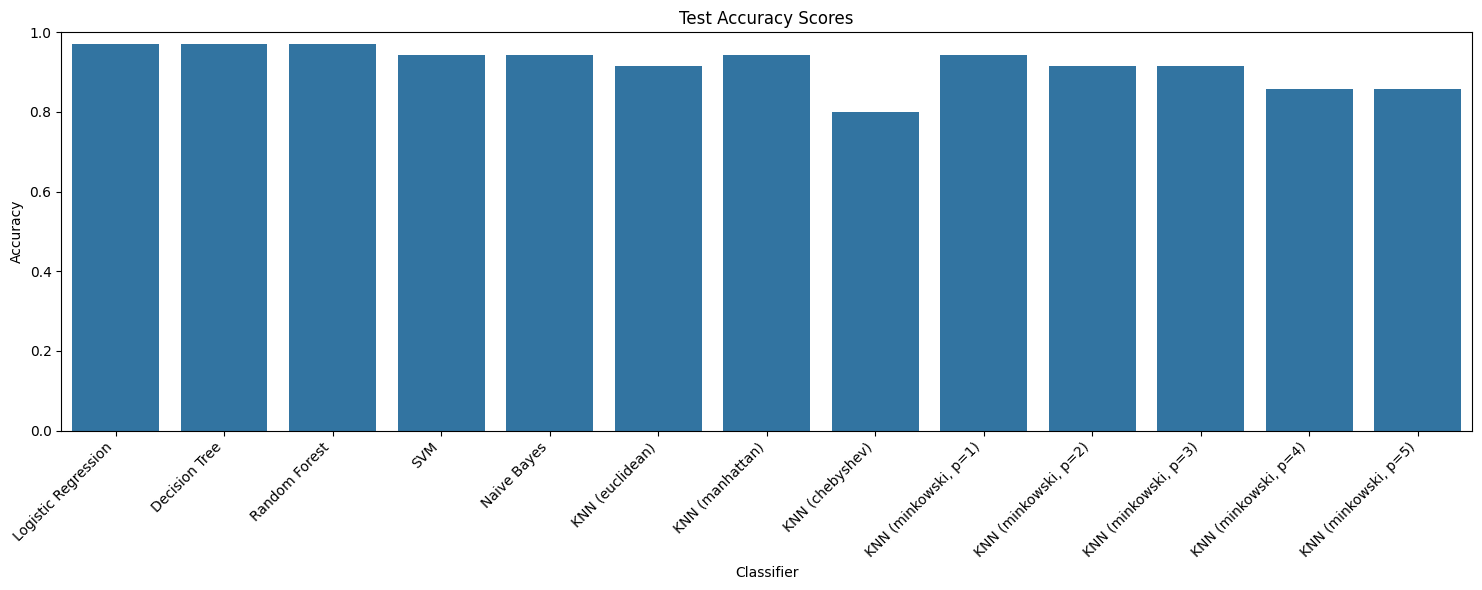

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Raag thesis/Bhatkhande-Dataset.csv")
print(df.shape)

# Feature selection and target variable
X = df.drop(columns=['Raag'])
y = df['Raag']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to evaluate a classifier
def evaluate_classifier(name, clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy}\n')
    return accuracy, cm


# Define the classifiers (excluding KNN initially)
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(splitter='best', max_depth=None),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

accuracy_scores = []
confusion_matrices = {}

# Evaluate the other classifiers
for name, clf in classifiers.items():
    accuracy, cm = evaluate_classifier(name, clf, X_train, X_test, y_train, y_test)
    accuracy_scores.append((name, accuracy))
    confusion_matrices[name] = cm


# Now handle KNN with different metrics
knn_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] # Add more as needed
knn_accuracy_scores = []
knn_confusion_matrices = {}


for metric in knn_metrics:
    if metric == 'minkowski':
        # Minkowski needs a p-value;  experiment with different values
        for p in [1, 2, 3, 4, 5]:  # Example p-values
            knn = KNeighborsClassifier(n_neighbors=7, metric=metric, p=p)
            name = f"KNN ({metric}, p={p})"
            accuracy, cm = evaluate_classifier(name, knn, X_train, X_test, y_train, y_test)
            knn_accuracy_scores.append((name, accuracy))
            knn_confusion_matrices[name] = cm
    else:
        knn = KNeighborsClassifier(n_neighbors=7, metric=metric)
        name = f"KNN ({metric})"
        accuracy, cm = evaluate_classifier(name, knn, X_train, X_test, y_train, y_test)
        knn_accuracy_scores.append((name, accuracy))
        knn_confusion_matrices[name] = cm



# ... (Rest of your plotting code - adapt to include KNN results)
# Combine accuracy scores
all_accuracy_scores = accuracy_scores + knn_accuracy_scores

# Convert all accuracy scores into a DataFrame for easier plotting
accuracy_df = pd.DataFrame({
    'Classifier': [name for name, _ in all_accuracy_scores],
    'Accuracy': [score for _, score in all_accuracy_scores]
})



# Plot accuracy scores comparison
plt.figure(figsize=(15, 6))  # Increased figure size
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df)
plt.title('Test Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# ... (Similarly, adapt your confusion matrix plotting code)